### Study of Optimal City

In [1]:
__author__='Enrique Sanz Gonzalez'

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pylab as plt
#import seaborn
%matplotlib inline

## Import data

In [3]:
MSA_codes = pd.read_csv('MSA_Normalized_sorted/MSA_codes.csv')

In [4]:
MSA_sector = pd.read_excel('MSA_Normalized_sorted/MSA_Normalized_sorted.xls', header = 0)

In [5]:
SMA_Name = pd.read_csv('MSA_Normalized_sorted/SMA_codes_Names.csv').iloc[:,1:]

In [6]:
SMA_per_capita = pd.read_csv('MSA_Normalized_sorted/per_capita_msa.csv')

## Merging data

In [7]:
#MSA = MSA_sector.iloc[:,:]
MSA_sector = MSA_sector.drop('Unnamed: 4', axis = 1)

In [8]:
MSA_sector['County_State'] = MSA_sector.County + ', ' + MSA_sector.State

In [9]:
MSA_codes = MSA_codes.drop('Unnamed: 0', axis = 1)

In [10]:
MSA = pd.merge(MSA_codes,MSA_sector, on = 'County_State', how = 'inner')

C:\Users\enrique\Anaconda2\lib\site-packages\pandas\tools\merge.py:714: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  rlab = rizer.factorize(rk)


In [11]:
MSA.head()

,MSA,Code,County_State,State,County,Pop 2000,Total,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Unknown,Nonroad,Transport,Total area sq miles,Density per square mile of land area
0,10180,48059,"Callahan County, TX",TX,Callahan County,12905,0.076143,0.035945,0.459007,0.106726,0.000000,5.131942,0.0,0.000000,0.000000,0.166620,5.298563,1276.33,370.1
1,10180,48253,"Jones County, TX",TX,Jones County,20785,0.191232,0.052065,0.028744,0.086624,6.689065,1.775457,0.0,0.057850,0.145415,0.365256,2.343978,753.58,20.6
2,10180,48441,"Taylor County, TX",TX,Taylor County,126555,0.382555,0.176507,0.122232,0.216701,0.000000,1.970745,0.0,0.119326,0.299949,0.117378,2.507398,2357.75,0.5
3,10420,39133,"Portage County, OH",OH,Portage County,152061,0.481948,0.218311,0.292481,0.556089,0.000000,1.893560,0.0,0.008256,0.020753,0.179986,2.102555,426.33,99.7
4,10420,39153,"Summit County, OH",OH,Summit County,542899,1.566309,0.230575,0.515684,0.581992,0.000000,1.247158,0.0,0.055781,0.140216,0.113678,1.556833,634.72,365.2


In [12]:
#table = table.dropna()

In [13]:
MSA.Total = MSA.Total*1000000
MSAs = MSA.groupby(by = 'MSA').sum()

In [14]:
MSAs = MSAs.reset_index()

In [15]:
MSAs.head(2)

,MSA,Code,Pop 2000,Total,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Unknown,Nonroad,Transport,Total area sq miles,Density per square mile of land area
0,10180,144753,160245,6.499298e+05,0.264517,0.609983,0.410050,6.689065,8.878144,0.0,0.177176,0.445364,0.649255,10.149939,4387.66,391.2
1,10420,78286,694960,2.048257e+06,0.448886,0.808165,1.138082,0.000000,3.140719,0.0,0.064037,0.160969,0.293664,3.659388,1061.05,464.9


In [16]:
SMA_Name.MSA = SMA_Name.MSA*10.0

In [17]:
MSA_total = pd.merge(MSAs,SMA_Name, on= 'MSA')

In [18]:
MSA_total.MSA_Name = MSA_total.MSA_Name.apply(lambda x : x.replace('Metropolitan Statistical Area\r\n',''))

In [19]:
MSA_total = MSA_total[[u'MSA', u'Code', u'Pop 2000', u'Total',u'Total area sq miles',
                       u'Density per square mile of land area',u'MSA_Name']]

In [20]:
MSA_total.columns = [u'MSA_code', u'Code', u'Pop_2000', u'Total_Carbon_Emissions',u'Total area sq miles',
                       u'Density per square mile of land area',u'MSA_Name']

In [21]:
MSA_sort_GHG = MSA_total.sort_values('Total_Carbon_Emissions')

## Exploratory Analysis

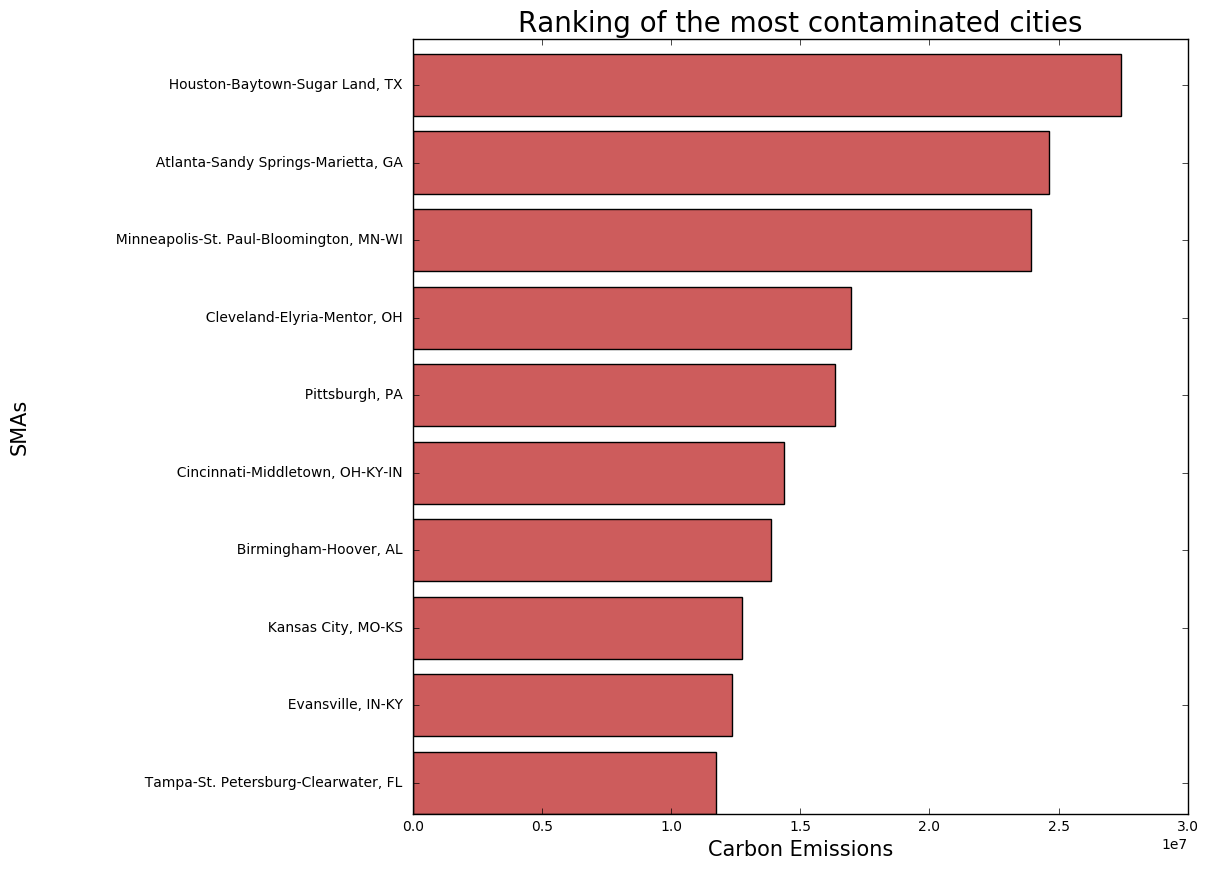

In [36]:
plt.figure(figsize = (10,10))
plt.barh(np.arange(0,10),MSA_sort_GHG.Total_Carbon_Emissions.iloc[-10:], color = 'Indianred')
plt.title('Ranking of the most contaminated cities', size = 20)
plt.ylabel('SMAs', size = 15)
plt.xlabel('Carbon Emissions', size = 15)
plt.yticks(np.arange(0.4,10.4),list(MSA_sort_GHG.MSA_Name.iloc[-10:]))
plt.show()

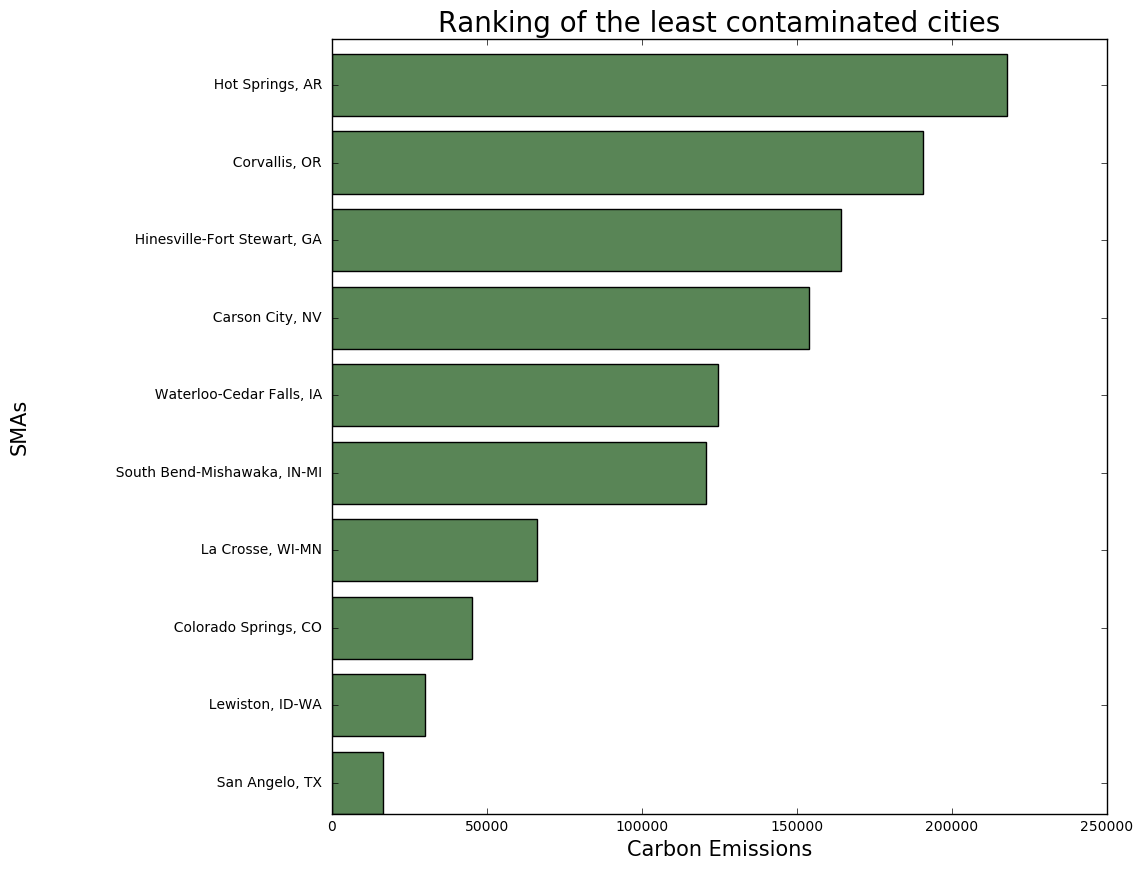

In [35]:
plt.figure(figsize = (10,10))
plt.barh(np.arange(0,10),MSA_sort_GHG.Total_Carbon_Emissions.iloc[:10], color = 'darksage')
plt.title('Ranking of the least contaminated cities', size = 20)
plt.ylabel('SMAs', size = 15)
plt.xlabel('Carbon Emissions', size = 15)
plt.yticks(np.arange(0.4,10.4),list(MSA_sort_GHG.MSA_Name.iloc[:10]))
plt.show()

## Scatter plots

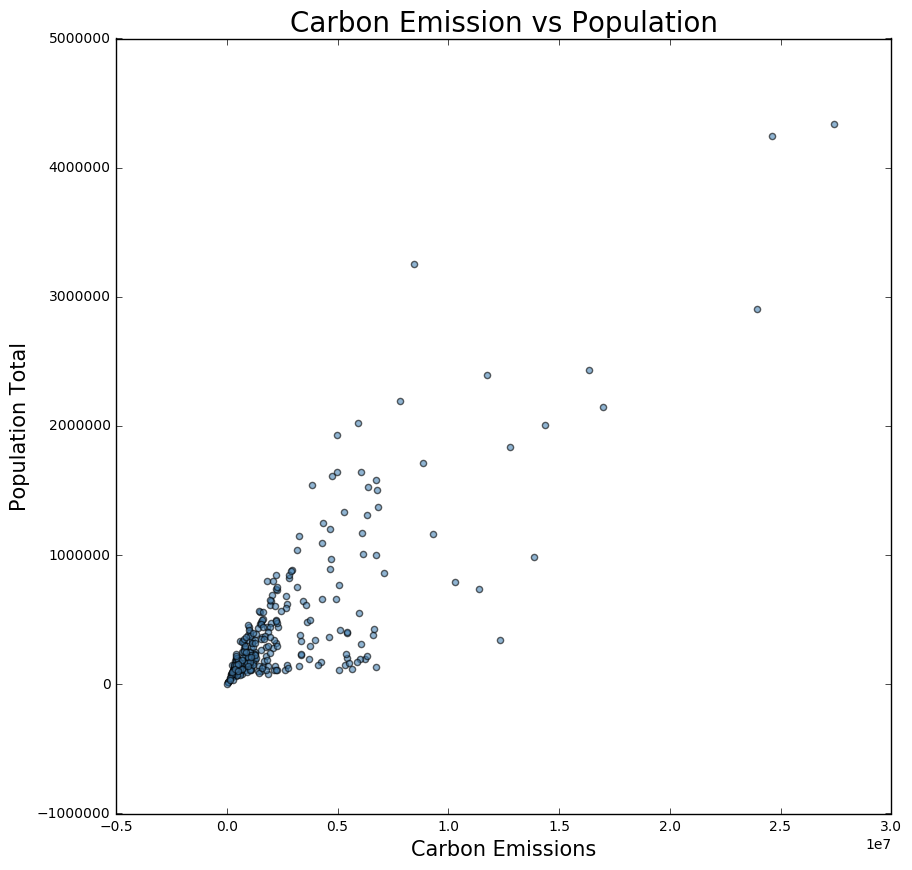

In [24]:
plt.figure(figsize= (10,10))
plt.scatter(MSA_total.Total_Carbon_Emissions,MSA_total.Pop_2000,c = 'SteelBlue', alpha=0.6)
plt.title('Carbon Emission vs Population', size = 20)
plt.xlabel('Carbon Emissions', size = 15)
plt.ylabel('Population Total', size = 15)
plt.show()

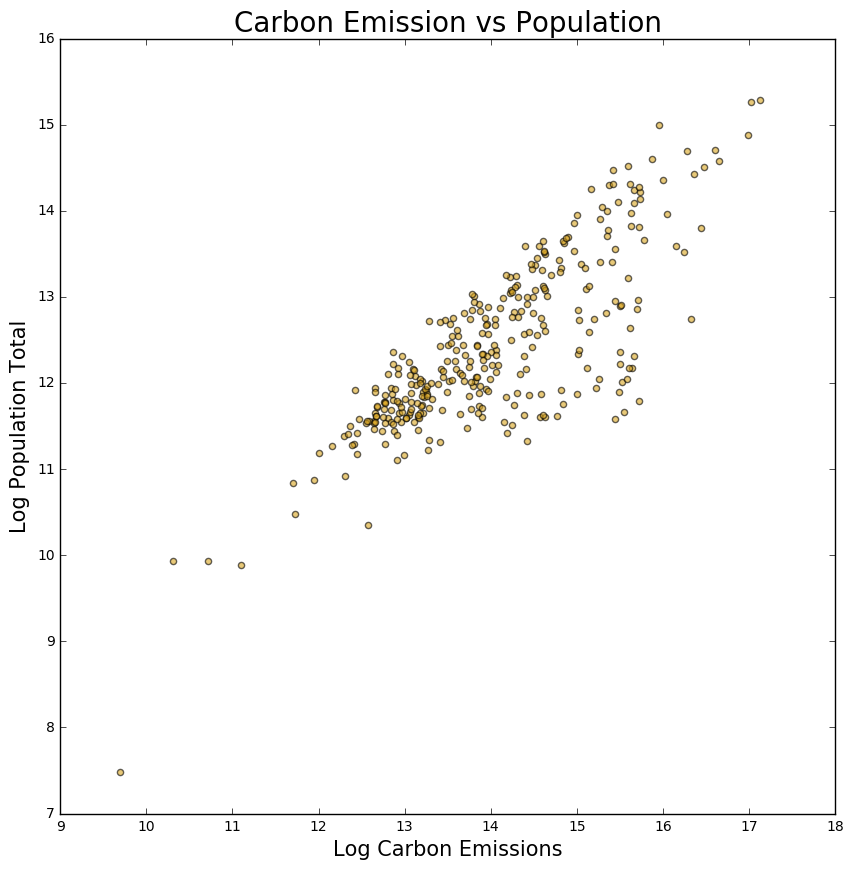

In [25]:
plt.figure(figsize= (10,10))
plt.scatter(np.log(MSA_total['Total_Carbon_Emissions']), np.log(MSA_total.Pop_2000), c = 'goldenrod', alpha=0.6)
plt.title('Carbon Emission vs Population', size = 20)
plt.xlabel('Log Carbon Emissions', size = 15)
plt.ylabel('Log Population Total', size = 15)
plt.show()

In [26]:
##removing outliers

In [27]:
MSA_red = MSA_total [MSA_total['Pop_2000']>100000]

In [28]:
# normalizar

In [29]:
MSA_red['Normalized_Total_Carbon_Emissions'] = MSA_red['Total_Carbon_Emissions']/MSA_red['Pop_2000']
MSA_red.head(2)

C:\Users\enrique\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,MSA_code,Code,Pop_2000,Total_Carbon_Emissions,Total area sq miles,Density per square mile of land area,MSA_Name,Normalized_Total_Carbon_Emissions
0,10180,144753,160245,6.499298e+05,4387.66,391.2,"Abilene, TX",4.055850
1,10420,78286,694960,2.048257e+06,1061.05,464.9,"Akron, OH",2.947302


In [41]:
MSA_Normalized_sorted = MSA_red.sort_values('Normalized_Total_Carbon_Emissions')

In [42]:
MSA_Normalized_sorted.head()

,MSA_code,Code,Pop_2000,Total_Carbon_Emissions,Total area sq miles,Density per square mile of land area,MSA_Name,Normalized_Total_Carbon_Emissions
151,27340,37133,150355,248844.832778,401.21,295.7,"Jacksonville, NC",1.655049
43,14740,53035,231969,385786.438818,565.98,585.8,"Bremerton-Silverdale, WA",1.663095
45,15180,48061,335227,589178.469945,203.20,58.5,"Brownsville-Harlingen, TX",1.757551
62,17020,6007,203171,387642.947464,1677.11,123.9,"Chico, CA",1.907964
329,49420,53077,222581,427474.200870,4311.61,51.8,"Yakima, WA",1.920533


## Step 2 : Ranking Cities

In [48]:
MSA_Normalized_sorted.iloc[-10:]

,MSA_code,Code,Pop_2000,Total_Carbon_Emissions,Total area sq miles,Density per square mile of land area,MSA_Name,Normalized_Total_Carbon_Emissions
191,31420,65765,222368,6.326702e+06,1262.47,307.4,"Macon, GA",28.451493
186,30980,145043,194042,6.017728e+06,2619.60,53.8,"Longview, TX",31.012501
170,29340,44042,193568,6.224225e+06,1280.15,35.4,"Lake Charles, LA",32.155239
233,37620,201452,164624,5.491250e+06,1302.67,523.2,"Parkersburg-Marietta, WV-OH",33.356317
299,45460,72506,170943,5.858006e+06,1460.34,471.7,"Terre Haute, IN",34.268766
100,21780,114850,342815,1.235289e+07,2362.13,460.9,"Evansville, IN-KY",36.033682
208,33780,26115,145945,5.346132e+06,720.98,86.5,"Monroe, MI",36.631145
238,38220,15173,107341,5.068528e+06,2084.67,135.3,"Pine Bluff, AR",47.218939
104,22380,4005,116320,5.632171e+06,18661.21,6.2,"Flagstaff, AZ",48.419627
319,48260,147119,132008,6.722961e+06,710.14,784.2,"Weirton-Steubenville, WV-OH",50.928439


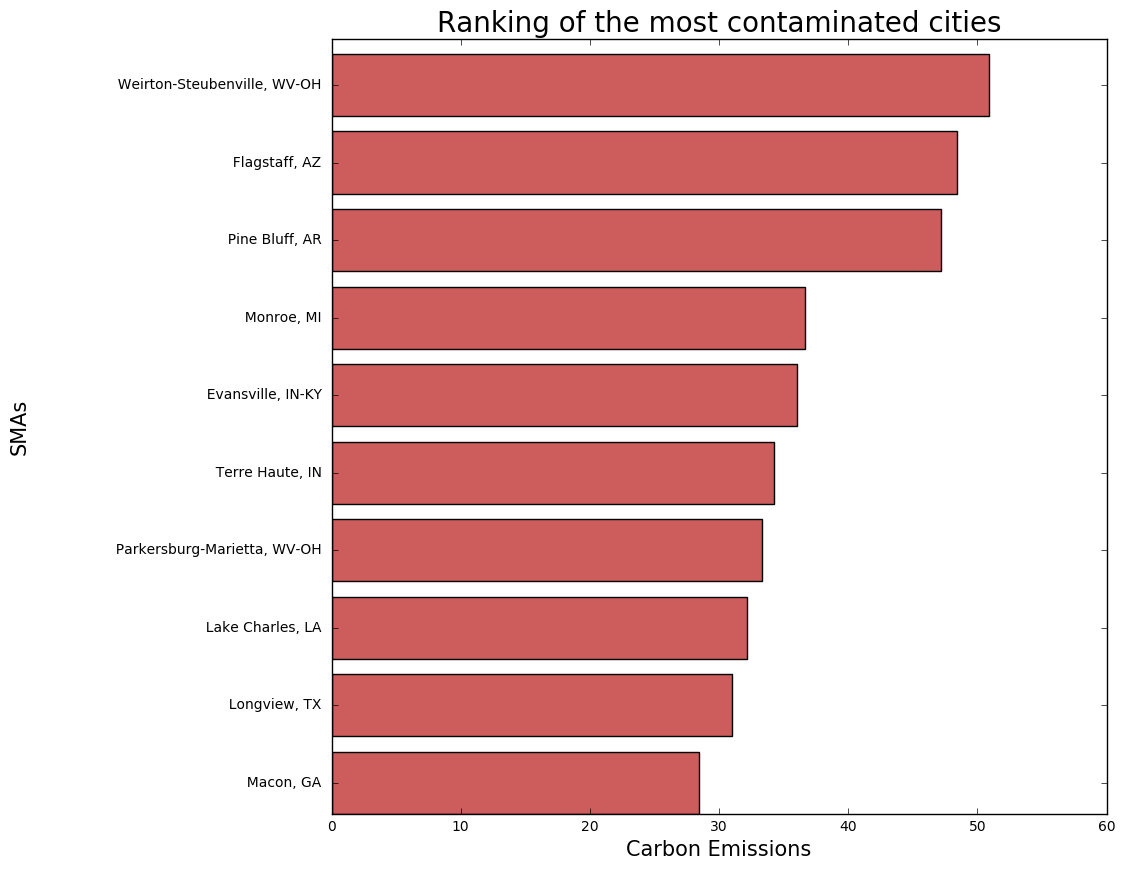

In [47]:
plt.figure(figsize = (10,10))
plt.barh(np.arange(0,10),MSA_Normalized_sorted.Normalized_Total_Carbon_Emissions.iloc[-10:], color = 'Indianred')
plt.title('Ranking of the most contaminated cities', size = 20)
plt.ylabel('SMAs', size = 15)
plt.xlabel('Carbon Emissions', size = 15)
plt.yticks(np.arange(0.4,10.4),list(MSA_Normalized_sorted.MSA_Name.iloc[-10:]))
plt.show()

In [49]:
MSA_Normalized_sorted.iloc[:10]

,MSA_code,Code,Pop_2000,Total_Carbon_Emissions,Total area sq miles,Density per square mile of land area,MSA_Name,Normalized_Total_Carbon_Emissions
151,27340,37133,150355,248844.832778,401.21,295.7,"Jacksonville, NC",1.655049
43,14740,53035,231969,385786.438818,565.98,585.8,"Bremerton-Silverdale, WA",1.663095
45,15180,48061,335227,589178.469945,203.20,58.5,"Brownsville-Harlingen, TX",1.757551
62,17020,6007,203171,387642.947464,1677.11,123.9,"Chico, CA",1.907964
329,49420,53077,222581,427474.200870,4311.61,51.8,"Yakima, WA",1.920533
154,27740,141369,181607,364893.791631,1289.85,221.3,"Johnson City, TN",2.009250
162,28660,144407,330714,667743.330028,3652.48,1123.2,"Killeen-Temple-Fort Hood, TX",2.019096
125,24780,74226,152772,312057.514869,896.30,725.3,"Greenville, NC",2.042636
102,22180,74144,336609,706443.911965,1949.65,79.0,"Fayetteville, NC",2.098708
174,29700,48479,193117,407319.150747,1094.43,37.8,"Laredo, TX",2.109183


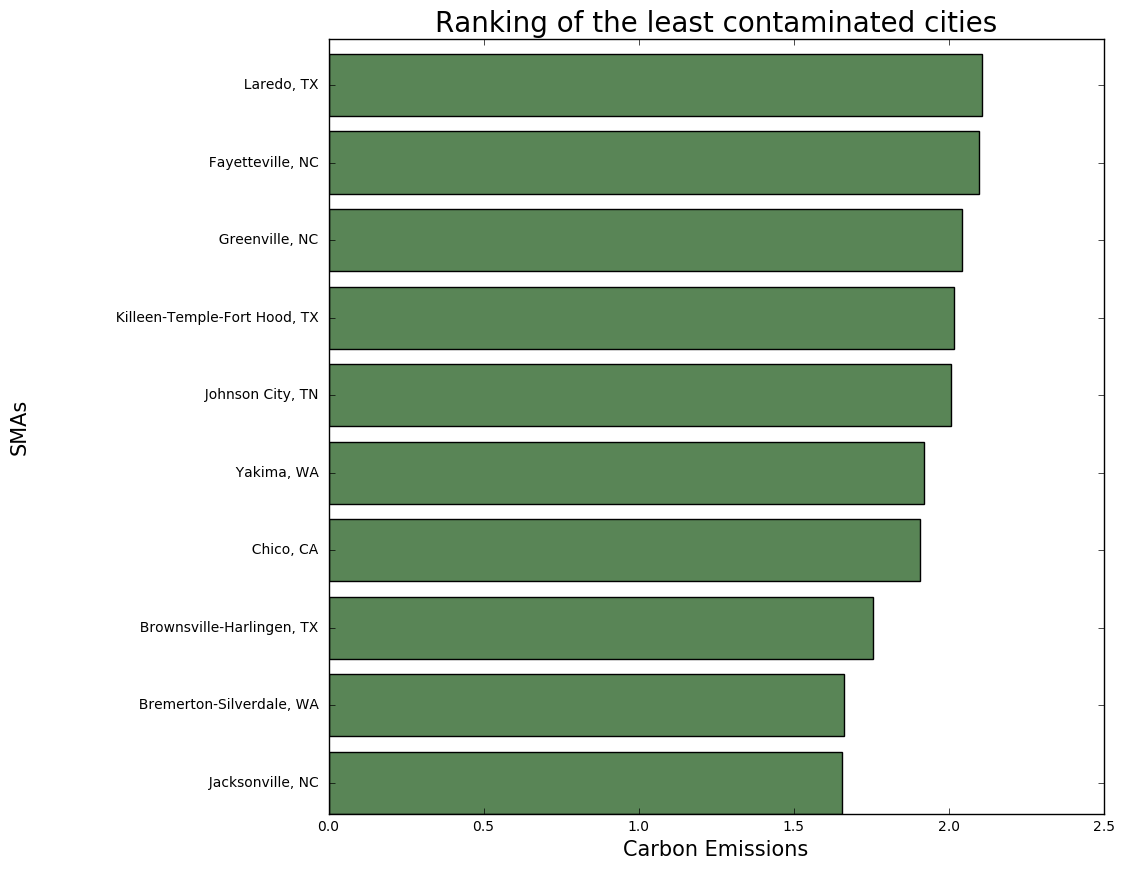

In [50]:
plt.figure(figsize = (10,10))
plt.barh(np.arange(0,10),MSA_Normalized_sorted.Normalized_Total_Carbon_Emissions.iloc[:10], color = 'darksage')
plt.title('Ranking of the least contaminated cities', size = 20)
plt.ylabel('SMAs', size = 15)
plt.xlabel('Carbon Emissions', size = 15)
plt.yticks(np.arange(0.4,10.4),list(MSA_Normalized_sorted.MSA_Name.iloc[:10]))
plt.show()

## Scatterplots

In [51]:
MSA_Normalized_sorted.columns

Index([                            u'MSA_code',
                                       u'Code',
                                   u'Pop_2000',
                     u'Total_Carbon_Emissions',
                        u'Total area sq miles',
       u'Density per square mile of land area',
                                   u'MSA_Name',
          u'Normalized_Total_Carbon_Emissions'],
      dtype='object')

In [ ]:
MSA_Normalized_sorted = MSA_red.sort('Pop_2000')

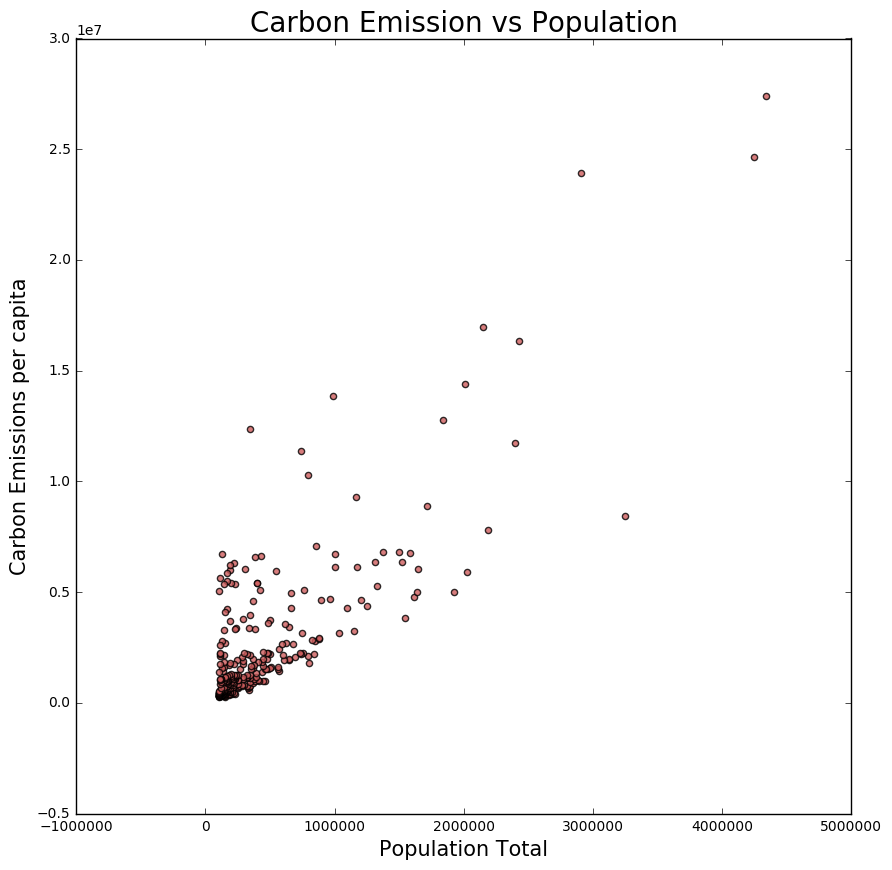

In [56]:
plt.figure(figsize= (10,10))
plt.scatter(MSA_Normalized_sorted['Pop_2000'],MSA_Normalized_sorted.Total_Carbon_Emissions,c = 'IndianRed', alpha=0.8)
plt.title('Carbon Emission vs Population', size = 20)
plt.ylabel('Carbon Emissions per capita', size = 15)
plt.xlabel('Population Total', size = 15)
plt.show()

Caption 1 : 

In [59]:
MSA_Normalized_sorted['Total_log'] = np.log10(MSA_Normalized_sorted.Total_Carbon_Emissions)
MSA_Normalized_sorted['Pop_2000_log'] = np.log(MSA_Normalized_sorted['Pop_2000'])

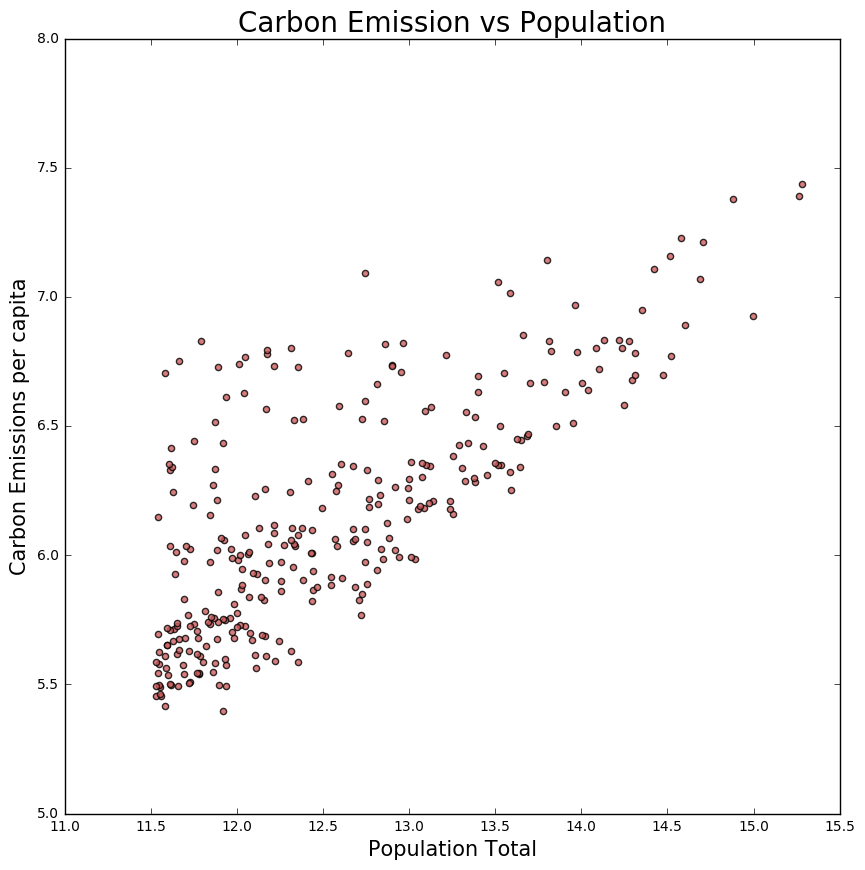

In [60]:
plt.figure(figsize= (10,10))

plt.scatter(MSA_Normalized_sorted['Pop_2000_log'],MSA_Normalized_sorted['Total_log'],c = 'IndianRed', alpha=0.8)
plt.title('Carbon Emission vs Population', size = 20)
plt.ylabel('Carbon Emissions per capita', size = 15)
plt.xlabel('Population Total', size = 15)
plt.show()

## Step : Line Fits

In [63]:
MSA_Normalized_sorted.head()

,MSA_code,Code,Pop_2000,Total_Carbon_Emissions,Total area sq miles,Density per square mile of land area,MSA_Name,Normalized_Total_Carbon_Emissions,Total_log,Pop_2000_log
151,27340,37133,150355,248844.832778,401.21,295.7,"Jacksonville, NC",1.655049,5.395929,11.920754
43,14740,53035,231969,385786.438818,565.98,585.8,"Bremerton-Silverdale, WA",1.663095,5.586347,12.354359
45,15180,48061,335227,589178.469945,203.20,58.5,"Brownsville-Harlingen, TX",1.757551,5.770247,12.722563
62,17020,6007,203171,387642.947464,1677.11,123.9,"Chico, CA",1.907964,5.588432,12.221803
329,49420,53077,222581,427474.200870,4311.61,51.8,"Yakima, WA",1.920533,5.630910,12.313046


In [58]:
MSA_Normalized_sorted.columns

Index([                            u'MSA_code',
                                       u'Code',
                                   u'Pop_2000',
                     u'Total_Carbon_Emissions',
                        u'Total area sq miles',
       u'Density per square mile of land area',
                                   u'MSA_Name',
          u'Normalized_Total_Carbon_Emissions',
                                  u'Total_log',
                               u'Pop_2000_log'],
      dtype='object')

In [61]:
lm1log = smf.ols(formula = 'Total_log ~ Pop_2000_log', MSA_Normalized_sorted = MSA_Normalized_sorted).fit()
lm2log = smf.ols(formula = 'Total_log ~ 1 + Pop_2000_log', MSA_Normalized_sorted = MSA_Normalized_sorted).fit()
lm3log = smf.ols(formula = 'Total_log ~ 1 + Pop_2000_log+ I(Pop_2000_log**2)', MSA_Normalized_sorted = MSA_Normalized_sorted).fit()

In [ ]:
plt.figure(figsize= (8,8))
plt.scatter(MSA_Normalized_sorted.Pop_2000_log,MSA_Normalized_sorted.Total_log,c = 'IndianRed')

plt.plot(MSA_Normalized_sorted.Pop_2000_log, lm1log.predict(), 'DarkBlue', label='line fit') # revisAR SI LINE fit y la otra es la misma.
#plt.plot(MSA_Normalized_sorted.Pop_2000_log, lm2log.predict(), 'Green', label='1-degree poly')
plt.plot(MSA_Normalized_sorted.Pop_2000_log, lm3log.predict(), 'Gold', label='quadratic line')
plt.legend()

plt.title('Carbon Emission vs Population', size = 20)
plt.ylabel('log(Carbon Emissions)', size = 15)
plt.xlabel('log(Population Total)', size = 15)
plt.legend()
plt.show()

In [ ]:
print lm1log.params
print lm3log.params
print 'Correlation coefficient: %f' % (stats.pearsonr(MSA_Normalized_sorted.Pop_2000_log,MSA_Normalized_sorted.Total_log)[0])

In [ ]:
lm1 = smf.ols(formula = 'Total ~ Pop_2000', MSA_Normalized_sorted = MSA_Normalized_sorted).fit()
lm2 = smf.ols(formula = 'Total ~ 1 + Pop_2000', MSA_Normalized_sorted = MSA_Normalized_sorted).fit()
lm3 = smf.ols(formula = 'Total ~ 1 + Pop_2000+ I(Pop_2000**2)', MSA_Normalized_sorted = MSA_Normalized_sorted).fit()

In [ ]:
y = lm3.params[0] + lm3.params[1]*x + lm3.params[2]*x**2

In [ ]:
fmin(f,13.5)

In [ ]:
np.exp(13.5)

In [ ]:
plt.figure(figsize= (8,8))
plt.scatter(MSA_Normalized_sorted.Pop_2000,MSA_Normalized_sorted.Total,c = 'IndianRed')

plt.plot(MSA_Normalized_sorted.Pop_2000, lm1.predict(), 'DarkBlue', label='line fit') # revisAR SI LINE fit y la otra es la misma.
plt.plot(MSA_Normalized_sorted.Pop_2000, lm2.predict(), 'Green', label='1-degree poly')
plt.plot(MSA_Normalized_sorted.Pop_2000, lm3.predict(), 'Gold', label='quadratic line')


plt.title('Carbon Emission vs Population', size = 20)
plt.ylabel('Carbon Emissions', size = 15)
plt.xlabel('Population Total', size = 15)
plt.show()

In [ ]:
print lm1.params
print lm3.params
print 'Correlation coefficient: %f' % (stats.pearsonr(MSA_Normalized_sorted.Pop_2000,MSA_Normalized_sorted.Total)[0])

In [ ]:
MSA_Normalized_sorted3 = MSA_Normalized_sorted[MSA_Normalized_sorted.Total<40]
MSA_Normalized_sorted3 = MSA_Normalized_sorted[MSA_Normalized_sorted.Pop_2000<3000000]
MSA_Normalized_sorted3 = MSA_Normalized_sorted[MSA_Normalized_sorted.Pop_2000>100]

In [ ]:
lm13 = smf.ols(formula = 'Total ~ Pop_2000', MSA_Normalized_sorted = MSA_Normalized_sorted3).fit()
lm23 = smf.ols(formula = 'Total ~ 1 + Pop_2000', MSA_Normalized_sorted = MSA_Normalized_sorted3).fit()
lm33 = smf.ols(formula = 'Total ~ 1 + Pop_2000+ I(Pop_2000**2)', MSA_Normalized_sorted = MSA_Normalized_sorted3).fit()

In [ ]:
print lm13.params
print lm33.params
print 'Correlation coefficient: %f' % (stats.pearsonr(MSA_Normalized_sorted3.Pop_2000,MSA_Normalized_sorted3.Total)[0])

In [ ]:
plt.figure(figsize= (8,8))
plt.scatter(MSA_Normalized_sorted.Pop_2000,MSA_Normalized_sorted.Total,c = 'IndianRed')

plt.plot(MSA_Normalized_sorted3.Pop_2000, lm1.predict(), 'DarkBlue', label='line fit') # revisAR SI LINE fit y la otra es la misma.
#plt.plot(MSA_Normalized_sorted3.Pop_2000, lm2.predict(), 'Green', label='1-degree poly')
plt.plot(MSA_Normalized_sorted3.Pop_2000, lm3.predict(), 'Gold', label='quadratic line')
plt.legend()


plt.title('Carbon Emission vs Population', size = 20)
plt.ylabel('Carbon Emissions', size = 15)
plt.xlabel('Population Total', size = 15)
plt.show()

In [ ]:
print lm13.params
print lm33.params
print 'Correlation coefficient: %f' % (stats.pearsonr(MSA_Normalized_sorted.Pop_2000,MSA_Normalized_sorted.Total)[0])

In [ ]:
lm33.params[0]
lm33.params[1]
lm33.params[1]

In [ ]:
x = 2000000

In [ ]:
y = lm33.params[0] + lm33.params[1]*x + lm33.params[2]*x**2
y

In [ ]:
from scipy.optimize import fmin
import math

In [ ]:
def f(x):
    y = lm33.params[0] + lm33.params[1]*x + lm33.params[2]*x**2

In [ ]:
fmin(f,2000000)

In [ ]:
new_MSA_Normalized_sorted = MSA_Normalized_sorted

In [ ]:
#new_MSA_Normalized_sorted = new_MSA_Normalized_sorted[new_MSA_Normalized_sorted.Pop_2000<2000000]
#new_MSA_Normalized_sorted = new_MSA_Normalized_sorted[new_MSA_Normalized_sorted.Total<200]

In [ ]:
lm4 = smf.ols(formula = 'Total ~ Pop_2000', MSA_Normalized_sorted = new_MSA_Normalized_sorted).fit()
lm5 = smf.ols(formula = 'Total ~ 1 + Pop_2000', MSA_Normalized_sorted = new_MSA_Normalized_sorted).fit()
lm6 = smf.ols(formula = 'Total ~ 1 + Pop_2000+ I(Pop_2000**2)', MSA_Normalized_sorted = new_MSA_Normalized_sorted).fit()

In [ ]:
print lm4.params
print lm6.params
print 'Correlation coefficient: %f' % (stats.pearsonr(new_MSA_Normalized_sorted.Pop_2000,new_MSA_Normalized_sorted.Total)[0])

In [ ]:
plt.figure(figsize= (8,8))
plt.scatter(new_MSA_Normalized_sorted.Pop_2000,new_MSA_Normalized_sorted.Total,c = 'IndianRed')

plt.plot(new_MSA_Normalized_sorted.Pop_2000, lm4.predict(), 'DarkBlue', label='line fit') # revisAR SI LINE fit y la otra es la misma.
#plt.plot(new_MSA_Normalized_sorted.Pop_2000, lm5.predict(), 'Green', label='1-degree poly')
plt.plot(new_MSA_Normalized_sorted.Pop_2000, lm6.predict(), 'Gold', label='quadratic line')
plt.legend()


plt.title('Carbon Emission vs Population', size = 20)
plt.ylabel('Carbon Emissions', size = 15)
plt.xlabel('Population Total', size = 15)
plt.show()

In [ ]:
MSA_Normalized_sorted2 = MSA_red_norm.sort('Density')

In [ ]:
MSA_Normalized_sorted2['Total_log'] = np.log10(MSA_Normalized_sorted2.Total)
MSA_Normalized_sorted2['Density_log'] = np.log(MSA_Normalized_sorted2['Density'])

In [ ]:
lm10log = smf.ols(formula = 'Total_log ~ Density_log', MSA_Normalized_sorted = MSA_Normalized_sorted2).fit()
lm20log = smf.ols(formula = 'Total_log ~ 1 + Density_log', MSA_Normalized_sorted = MSA_Normalized_sorted2).fit()
lm30log = smf.ols(formula = 'Total_log ~ 1 + Density_log+ I(Density_log**2)', MSA_Normalized_sorted = MSA_Normalized_sorted2).fit()

In [ ]:
plt.figure(figsize= (8,8))
plt.scatter(MSA_Normalized_sorted2.Density_log,MSA_Normalized_sorted2.Total_log,c = 'IndianRed')

plt.plot(MSA_Normalized_sorted2.Density_log, lm10log.predict(), 'DarkBlue', label='line fit') # revisAR SI LINE fit y la otra es la misma.
#plt.plot(MSA_Normalized_sorted2.Density_log, lm20log.predict(), 'Green', label='1-degree poly')
plt.plot(MSA_Normalized_sorted2.Density_log, lm30log.predict(), 'Gold', label='quadratic line')

plt.title('Carbon Emission vs Density', size = 20)
plt.ylabel('log(Carbon Emissions per capita)  (ton/pers)', size = 15)
plt.xlabel('log(Density) (pop/mil2)', size = 15)
plt.legend()
plt.show() 

In [ ]:
x =5

In [ ]:
Y = 0.706145 +0.002950* np.log(x) -0.000745 *np.log(x)**2
Y

In [ ]:
print lm10log.params
print lm30log.params
print 'Correlation coefficient: %f' % (stats.pearsonr(MSA_Normalized_sorted2.Density,MSA_Normalized_sorted2.Total)[0])

In [ ]:
new_MSA_Normalized_sorted2 = MSA_Normalized_sorted2

In [ ]:
lm40 = smf.ols(formula = 'Total ~ Density', MSA_Normalized_sorted = new_MSA_Normalized_sorted2).fit()
lm50 = smf.ols(formula = 'Total ~ 1 + Density', MSA_Normalized_sorted = new_MSA_Normalized_sorted2).fit()
lm60 = smf.ols(formula = 'Total ~ 1 + Density+ I(Density**2)', MSA_Normalized_sorted = new_MSA_Normalized_sorted2).fit()

In [ ]:
plt.figure(figsize= (8,8))
plt.scatter(new_MSA_Normalized_sorted2.Density,new_MSA_Normalized_sorted2.Total,c = 'IndianRed')

plt.plot(new_MSA_Normalized_sorted2.Density, lm40.predict(), 'DarkBlue', label='line fit') # revisAR SI LINE fit y la otra es la misma.
#plt.plot(new_MSA_Normalized_sorted2.Density, lm50.predict(), 'Green', label='1-degree poly')
plt.plot(new_MSA_Normalized_sorted2.Density, lm60.predict(), 'Gold', label='quadratic line')


plt.title('Carbon Emission vs Density', size = 20)
plt.ylabel('Carbon Emissions(ton/pers)', size = 15)
plt.xlabel('Density(population/mil2)', size = 15)
plt.legend()
plt.show()

In [ ]:
print lm40.params
print lm60.params
print 'Correlation coefficient: %f' % (stats.pearsonr(new_MSA_Normalized_sorted2.Density,new_MSA_Normalized_sorted2.Total)[0])